# Researching an algorithm for Randomising a set of numbers

[1,2,3,4,5,6]
<br>
if i only want to use 4 elements at a specific point of time then
<br>
t1 = [1,2,3,4]
and unused set will be [5,6] let it be called U
<br>
now for the next iteration, i can mix U and t1.<br>
i.e t2 = U+t1
and the unused elements out of the initial set will be assigned to U.<br>

so, t2 = [5,1,6,2] U = [3,4]
<br>
similarly t3 = [3,5,4,1] U = [6,2]
<br>
and so on..
now writing a function to create this  so that we can find periodicity of this shuffling.

In [1]:
def Shuff(t):
    if(t%3!=0):
        raise ValueError
        return None
    u_length = int(t/3)
    kernal_length = int(t/3) * 2
    solution = []
    t1 = [i for i in range(1,kernal_length+1)]
    u = [i+kernal_length+1 for i in range(u_length)]
    initial = list(t1)
    # print(t1)
    # print(u)
    solution.append(t1)
    flag = True
    while(True):
        t2 = []
        i=0
        j=0
        while(len(t2) != kernal_length):
            t2.append(u[i])
            i += 1
            t2.append(t1[j])
            j += 1
        # print("Finished iteration ",t2)
        u = t1[kernal_length//2:]
        t1 = t2
    
        if(t2 == initial):
            # print("Solution Found")
            break
        solution.append(t2)
    return solution

In [2]:
#mathematical algorithm for Shuff Function
def Shuff2(t):
    if(t%3!=0):
        raise ValueError
    u_length = int(t/3)
    kernal_length = int(t/3) * 2
    solution = []
    t1 = [i for i in range(1,t+1)]
    initial = list(t1[:kernal_length])
    solution.append(initial)
    mold = [0 for i in t1]
    while(True):
        odds = 1
        evens = 0
        val = u_length*2
        t2 = list(mold)
        for i in range(len(t1)):
            if(i < 1*u_length):
                t2[i] = t1[odds]
                # print("added odd",odds)
                odds += 2
            elif(i>2*u_length-1):
                t2[i] = t1[evens]
                # print("added even",evens)
                evens += 2
            else:
                # print("added val",val)
                t2[i] = t1[val]
                val += 1

        t1 = t2
        if(t2[:kernal_length] == initial):
            break
        solution.append(t2[:kernal_length])
    return solution

In [3]:
from time import time

In [11]:
start = time()
Shuff(249)
end = time()
print("Time V1 : {}".format(end - start))

Time V1 : 0.5668525695800781


In [12]:
start = time()
Shuff2(249)
end = time()
print("Time V2 : {}".format(end - start))

Time V2 : 0.6435959339141846


In [35]:
print(Shuff(9))

[[1, 2, 3, 4, 5, 6], [7, 1, 8, 2, 9, 3], [4, 7, 5, 1, 6, 8], [2, 4, 9, 7, 3, 5], [1, 2, 6, 4, 8, 9], [7, 1, 3, 2, 5, 6], [4, 7, 8, 1, 9, 3], [2, 4, 5, 7, 6, 8], [1, 2, 9, 4, 3, 5], [7, 1, 6, 2, 8, 9], [4, 7, 3, 1, 5, 6], [2, 4, 8, 7, 9, 3], [1, 2, 5, 4, 6, 8], [7, 1, 9, 2, 3, 5], [4, 7, 6, 1, 8, 9], [2, 4, 3, 7, 5, 6], [1, 2, 8, 4, 9, 3], [7, 1, 5, 2, 6, 8], [4, 7, 9, 1, 3, 5], [2, 4, 6, 7, 8, 9]]


Finding the freaquency

In [25]:
import matplotlib.pyplot as plt

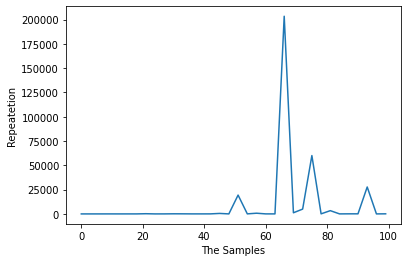

In [33]:
x = []
y = []
for i in range(0,100,3):
    x.append(i)
    y.append(len(Shuff(i)))

plt.plot(x,y)
plt.xlabel('The Samples')
plt.ylabel('Repeatetion')
plt.show()

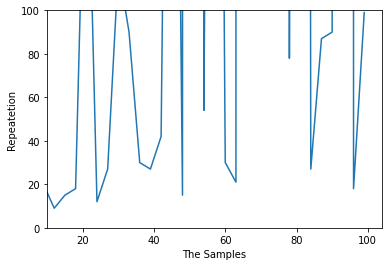

In [32]:
plt.plot(x,y)
plt.xlabel('The Samples')
plt.ylim(0,100)
plt.xlim(10)
plt.ylabel('Repeatetion')
plt.show()

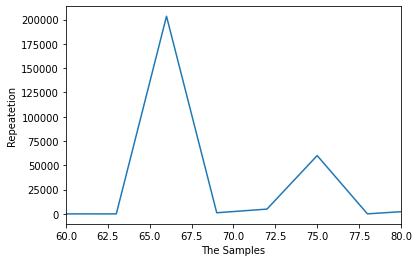

In [34]:
plt.plot(x,y)
plt.xlabel('The Samples')
plt.xlim(60,80)
plt.ylabel('Repeatetion')
plt.show()

[]

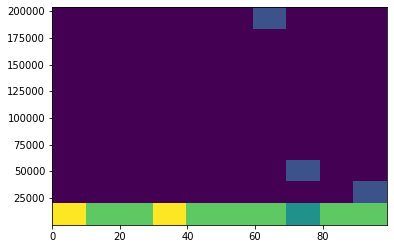

In [68]:
plt.hist2d(x,y)
plt.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd512aea60>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd512bb1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd512ae6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd512bb8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd512bbc70>],
 'means': []}

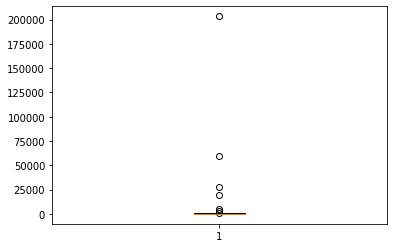

In [46]:
plt.boxplot(y)

(0.0, 25000.0)

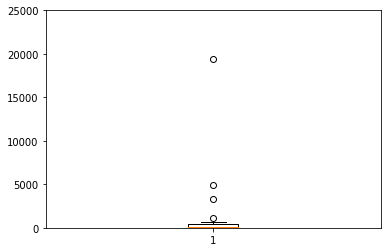

In [66]:
plt.boxplot(y)
plt.ylim(0,25000)

In [47]:
import numpy as np
y = np.array(y)
x = np.array(x)

In [53]:
print(y.min(),y.max())

1 203490


In [51]:
print(y.max())

203490


In [62]:
max_x = [x[i] for i in range(len(x)) if y[i] == y.max()]
min_x = [x[i] for i in range(len(x)) if y[i] == y.min()]
samples = {x[i]: y[i] for i in range(len(x))}
print(samples)
print("Max x:{} y:{}".format(max_x,y.max()))
print("Min x:{} y:{}".format(min_x,y.min()))

{0: 1, 3: 3, 6: 6, 9: 20, 12: 9, 15: 15, 18: 18, 21: 210, 24: 12, 27: 27, 30: 120, 33: 90, 36: 30, 39: 27, 42: 42, 45: 504, 48: 15, 51: 19380, 54: 54, 57: 720, 60: 30, 63: 21, 66: 203490, 69: 1184, 72: 4960, 75: 60060, 78: 78, 81: 3360, 84: 27, 87: 87, 90: 90, 93: 27720, 96: 18, 99: 99}
Max x:[66] y:203490
Min x:[0] y:1


### Observation
<ul>
<li> Minimum freaquency : 1 for x = 0 </li>
<li> Maximum Freaquency : 203490 for x = 66</li>
<li> Values of x for which x==y : [3,6,15,18,27,42,54,87,90,99]</li>
<li> Graph showed aggressive rise in freaquency for x=66 </li>
<li> Box Plot showed Data was heavily skewed because of aggressive increment in freequency for x = 66</li>
<li> x = [51,69,72,75,93]</li>
</ul>

## Conclusion
<br>
The Freaquency contrary to the assumption was unable to explain.



## Appendix

For values of x till 126 <hr>

{0: 1, 3: 3, 6: 6, 9: 20, 12: 9, 15: 15, 18: 18, 21: 210, 24: 12, 27: 27,<br> 30: 120, 33: 90, 36: 30, 39: 27, 42: 42, 45: 504, 48: 15, 51: 19380, 54: 54, 57: 720, 60: 30, 63: 21, 66: 203490, 69: 1184, 72: 4960, 75: <br>60060, 78: 78, 81: 3360, 84: 27, 87: 87, 90: 90, 93: 27720, 96: 18,<br> 99: 99, 102: 990, 105: 392, 108: 5460, 111: 188790, 114: 180, 117: 3416, <br>120: 81, 123: 123, 126: 60060}
Max x:[66] y:203490<br>
Min x:[0] y:1<br>
<hr>
<img src=img.png>